In [4]:
import copy
import pandas as pd
import numpy as np 
import sklearn
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv(r'C:\Users\LIGHTRQX\Desktop\code\py\my babies\dataset\Chennai_1990_2022_Madras_Cleaned.csv')
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


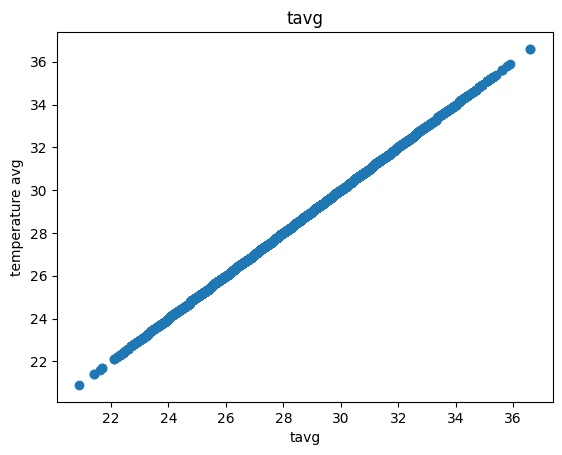

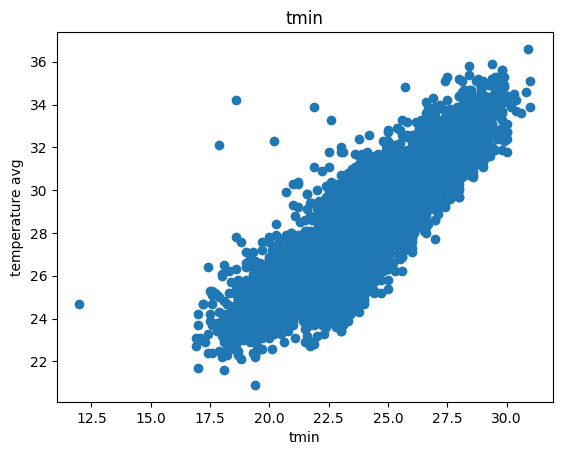

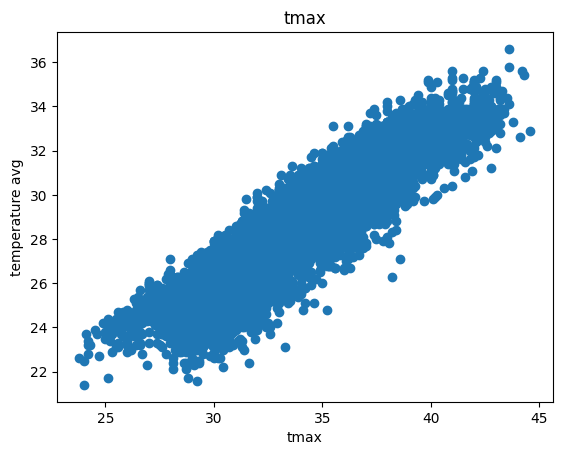

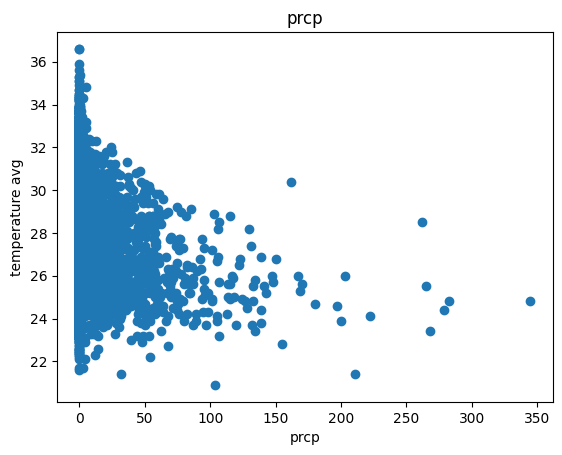

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["tavg"])  # Fixed scatter
    plt.title(label)  # Fixed title
    plt.ylabel("temperature avg")  # Fixed spelling
    plt.xlabel(label)
    plt.show()

train/valid/test dataset/

In [66]:
train ,test ,val = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\LIGHTRQX\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [67]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            x= dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x= dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    return data,x,y

    

In [73]:
_, x_train_tavg ,y_train_tavg = get_xy(train, "tavg", x_labels = ["tmin"])
_, x_val_tavg ,y_val_tavg = get_xy(val, "tavg", x_labels = ["tmin"])
_, x_test_tavg ,y_test_tavg = get_xy(test, "tavg", x_labels = ["tmin"])


In [69]:
x_train_tavg

array([[27.9],
       [23.2],
       [25.2],
       ...,
       [24.8],
       [27.8],
       [27.4]])

In [71]:

tavg_reg = LinearRegression()
tavg_reg.fit(x_train_tavg ,y_train_tavg)

LinearRegression()

In [78]:
# Ensure you are using the correct DataFrame
feature_cols = ['tmin', 'tmax', 'prcp']  # Adjust if needed

x_test_tavg = df[feature_cols].values  # Use df instead of df_test
y_test_tavg = df['tavg'].values.reshape(-1, 1)  # Reshape for compatibility

# Now, score the model
r2_score = tavg_reg.score(x_test_tavg, y_test_tavg)
print("R² Score:", r2_score)


R² Score: 0.9213904004668525


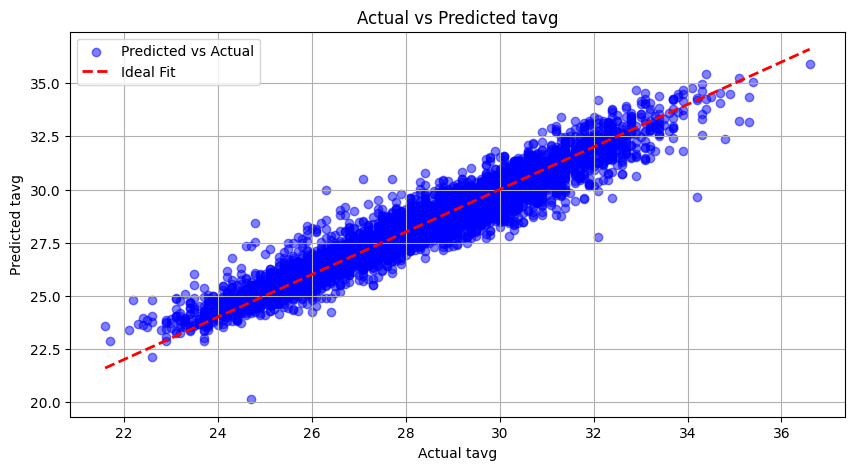

In [ ]:
# Predict tavg using the trained model
y_pred_tavg = tavg_reg.predict(x_test_tavg)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test_tavg, y_pred_tavg, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test_tavg.min(), y_test_tavg.max()], [y_test_tavg.min(), y_test_tavg.max()], 'r--', lw=2, label="Ideal Fit")  # 45-degree line

# Labels and title
plt.xlabel("Actual tavg")
plt.ylabel("Predicted tavg")
plt.title("Actual vs Predicted tavg")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



## linear regression model using nueral net

In [2]:
np.random.seed(42)
x_train_tavg = np.random.rand(7120, 1)  
y_train_tavg = 2.5 * x_train_tavg + np.random.normal(0, 0.1, size=(7120, 1))  

In [5]:
tavg_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
tavg_normalizer.adapt(x_train_tavg)

c:\Users\LIGHTRQX\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model = tf.keras.Sequential([
    tavg_normalizer,  
    tf.keras.layers.Dense(1) 
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='mean_squared_error')

In [7]:
history = model.fit(x_train_tavg, y_train_tavg, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.7392
Epoch 2/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.0108
Epoch 3/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0103
Epoch 4/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.0101
Epoch 5/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0101
Epoch 6/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.0103
Epoch 7/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0102
Epoch 8/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.0102
Epoch 9/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.0100
Epoch 10/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.0103
Epoch 11/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.0105
Epoch 12/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0103
Epoch 13/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0103
Epoch 14/500
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0100
Epoch 15/500
22

In [8]:
for layer in model.layers:
    weights = layer.get_weights()
    if weights:  # Check if the layer has trainable parameters
        print(f"Weights: {weights[0]}")
        if len(weights) > 1:
            print(f"Bias: {weights[1]}")

Weights: 0.49631109833717346
Bias: 0.08378468453884125
Weights: [[0.7350854]]
Bias: [1.2266554]


223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


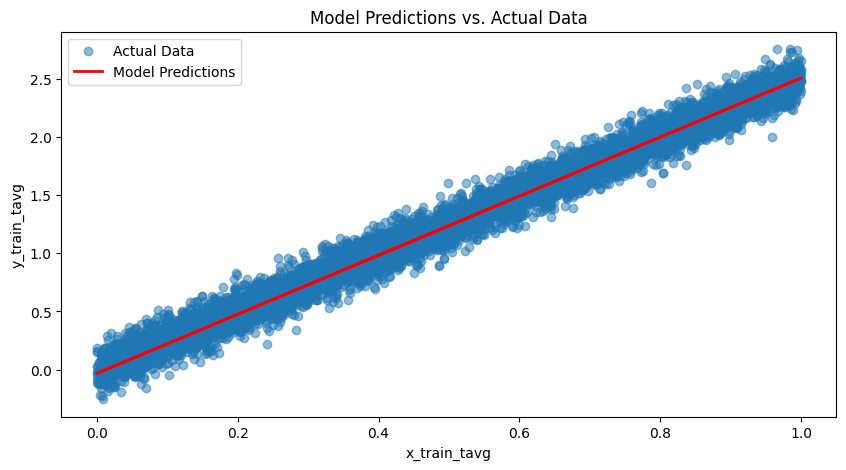

In [9]:
y_pred = model.predict(x_train_tavg)
plt.figure(figsize=(10, 5))
plt.scatter(x_train_tavg, y_train_tavg, label="Actual Data", alpha=0.5)
plt.plot(x_train_tavg, y_pred, color="red", linewidth=2, label="Model Predictions")
plt.xlabel("x_train_tavg")
plt.ylabel("y_train_tavg")
plt.title("Model Predictions vs. Actual Data")
plt.legend()
plt.show()
